In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import string
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing datasets
import zipfile
!unzip  '/content/drive/MyDrive/project data/2nddata.zip'


Archive:  /content/drive/MyDrive/project data/2nddata.zip
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: POS_CASH_balance.csv    
  inflating: previous_application.csv  


In [4]:
#Reading dataset
data=pd.read_csv("application_train.csv")

In [5]:

bureau                = pd.read_csv("bureau.csv")
bureau_balance        = pd.read_csv("bureau_balance.csv")
credit_card_balance   = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
pos_cash_balance      = pd.read_csv("POS_CASH_balance.csv")
previous_application  = pd.read_csv("previous_application.csv")

In [6]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("application_train     :",data.shape)
print ("bureau                :",bureau.shape)
print ("bureau_balance        :",bureau_balance.shape)
print ("credit_card_balance   :",credit_card_balance.shape)
print ("installments_payments :",installments_payments.shape)
print ("pos_cash_balance      :",pos_cash_balance.shape)
print ("previous_application  :",previous_application.shape)

application_train     : (307511, 122)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


In [8]:
data.info(verbose=True) #null_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
pd.set_option('display.max_rows', data.shape[0])
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


TARGET
0    282686
1     24825
Name: count, dtype: int64

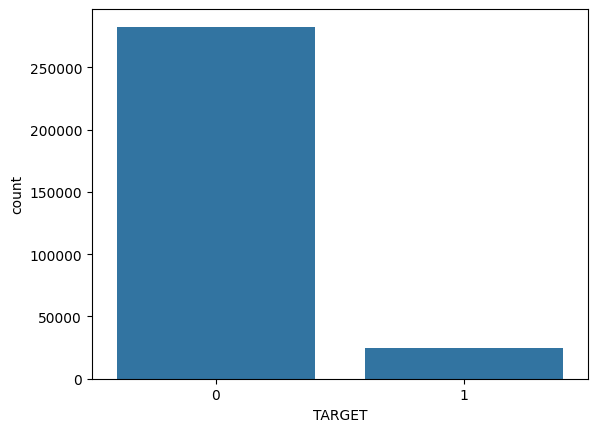

In [10]:
#Count plot
%time
sns.countplot(x = "TARGET", data = data)
data.loc[:, 'TARGET'].value_counts()

-  The data has target = 0 for people who can repay the loan and target = 1 for people who cannot repay the loan.   
-  The data is imbalanced because there is a high number of clients who repay the loan compared to clients who default.

In [11]:
#finding null values
pd.DataFrame(data.isnull().sum().sort_values(ascending = False))

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
NONLIVINGAPARTMENTS_MEDI,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_MODE,210199
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199


In [12]:
missing_values = data.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])
total_missing = missing_values.sum()
print("Total Missing Values:", total_missing)

Columns with Missing Values:
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


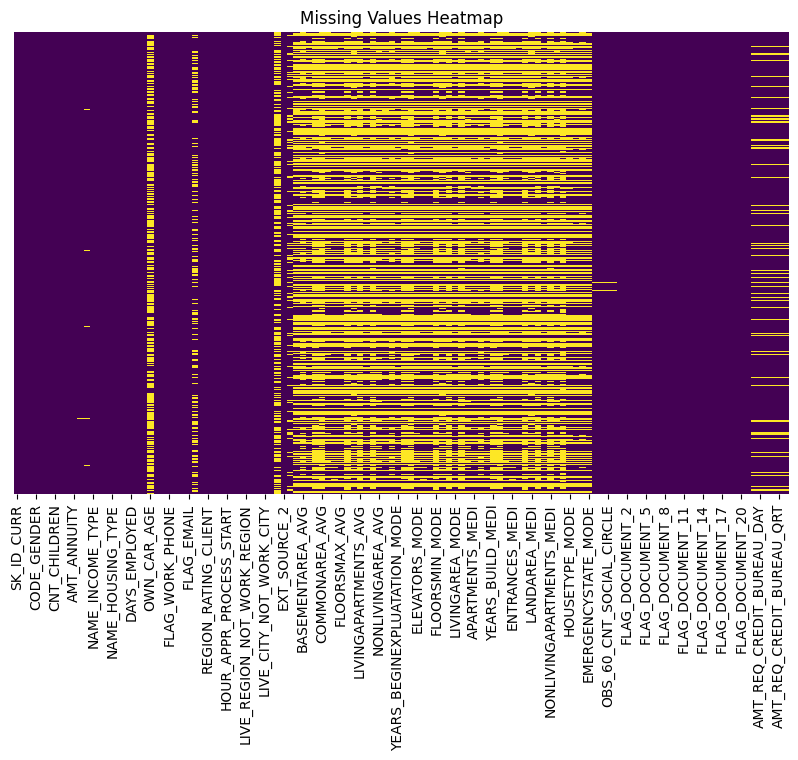

In [13]:
#heatmap of missing value
%time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


  missing values are typically represented by the color yellow

In [14]:
# Function to calculate missing values by column
def missing_values_table(data):
    # Total missing values
    mis_val = data.isnull().sum()

    # percentage of missing values
    mis_val_percent = 100 * data.isnull().sum() / len(data)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns= {0: 'Missing Values', 1 : '% of Total Values'})

    # sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

     # print some summary information
    print('Your selected dataframe has ' + str(data.shape[1]) +
         " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    # return the dataframe with missing in information
    return mis_val_table_ren_columns

In [15]:
import numpy as np

# Generate a 100x122 random matrix
matrix = np.random.randn(100, 122)

In [16]:
def calculate_missing_percentage(df):


  missing_values = df.isnull().sum().sum()
  total_values = df.size
  missing_percentage = missing_values / total_values * 100
  return missing_percentage

# Example usage
df = pd.DataFrame(np.random.randn(100, 122))
df.iloc[::10, :] = np.nan

missing_percentage = calculate_missing_percentage(df)
print(f"Total missing values: {missing_percentage:.2f}%")

Total missing values: 10.00%


In [17]:
df = pd.DataFrame(data)

# Check for null values
print(pd.isnull(df))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
import pandas as pd

def impute_missing_values_with_mean(df):


  for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)

  return df

# Example usage
df = pd.DataFrame(np.random.randn(100, 122))
df.iloc[::10, :] = np.nan

df_imputed = impute_missing_values_with_mean(df.copy())

In [19]:
missing_values = df_imputed.isnull().sum().sum()
total_values = df_imputed.size
missing_percentage = missing_values / total_values * 100

print(f"Total missing values in df_imputed: {missing_percentage:.2f}%")

Total missing values in df_imputed: 0.00%


In [20]:
#datatype
data.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [21]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [22]:
def plot_bar_gen(feature, df = None, orientation_horizontal = True):

    if df is None:
        df = data
    else:
        df = df

    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    sns.set_color_codes("bright")

    if orientation_horizontal == True:
        plt.figure(figsize=(10,6))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=df1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)

    else:
        plt.figure(figsize=(10,12))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.8)
    plt.show();

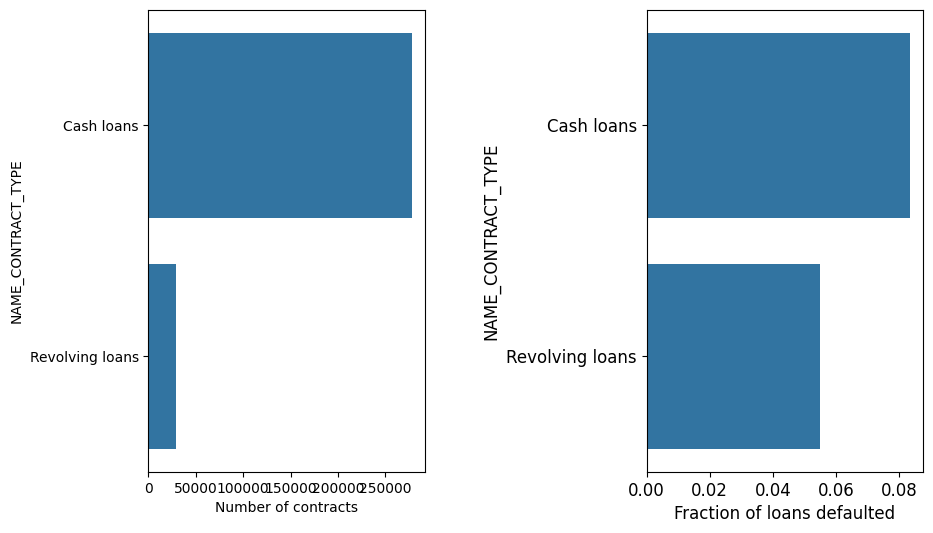

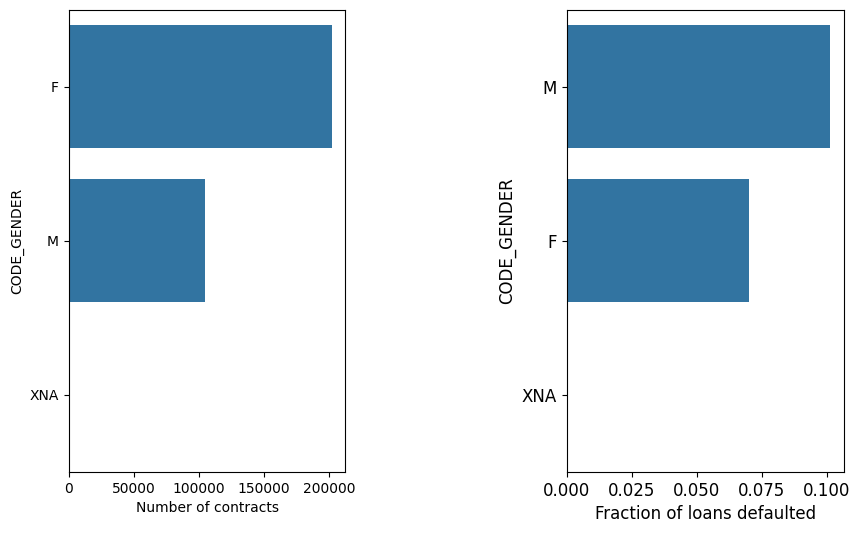

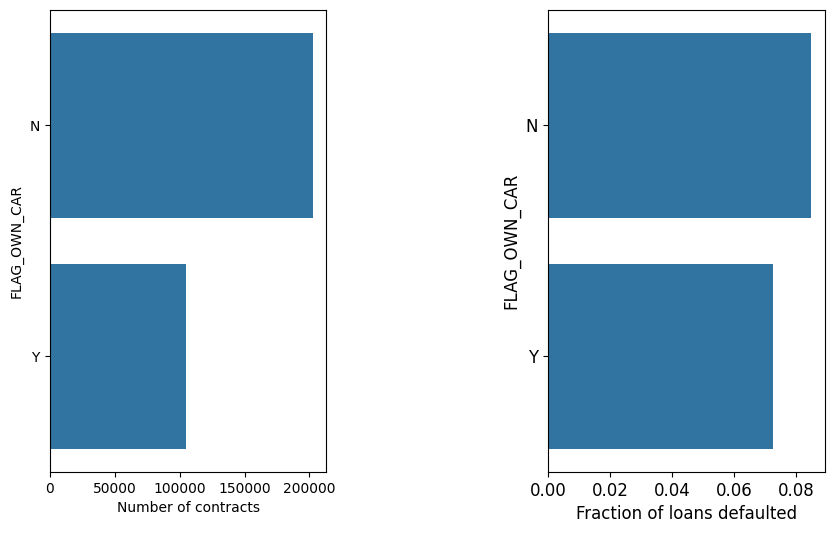

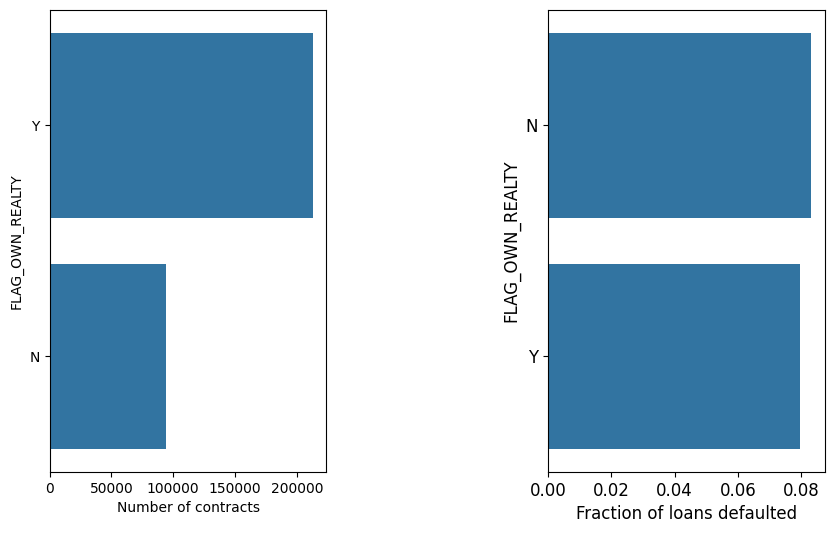

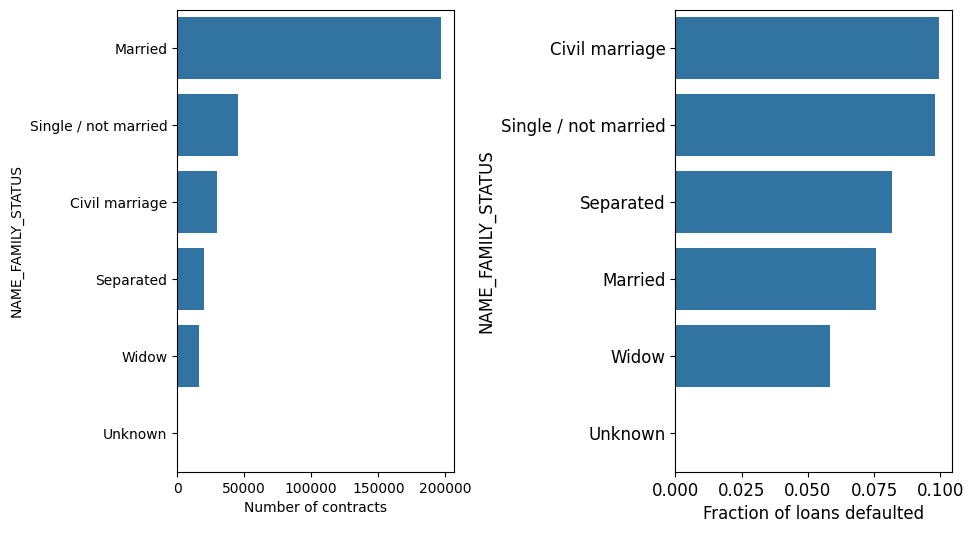

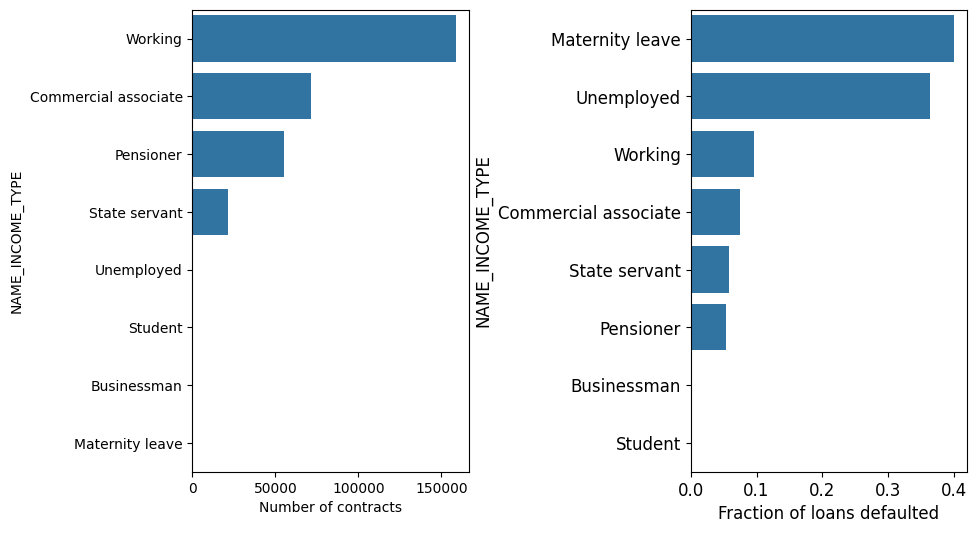

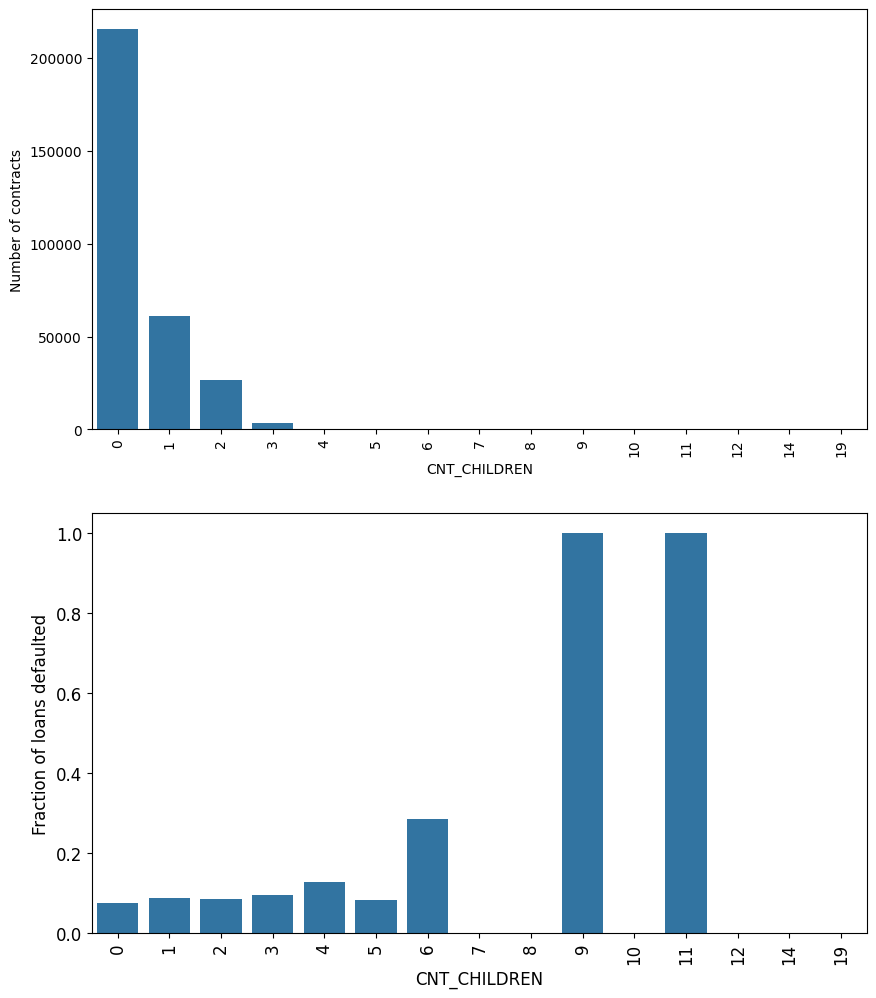

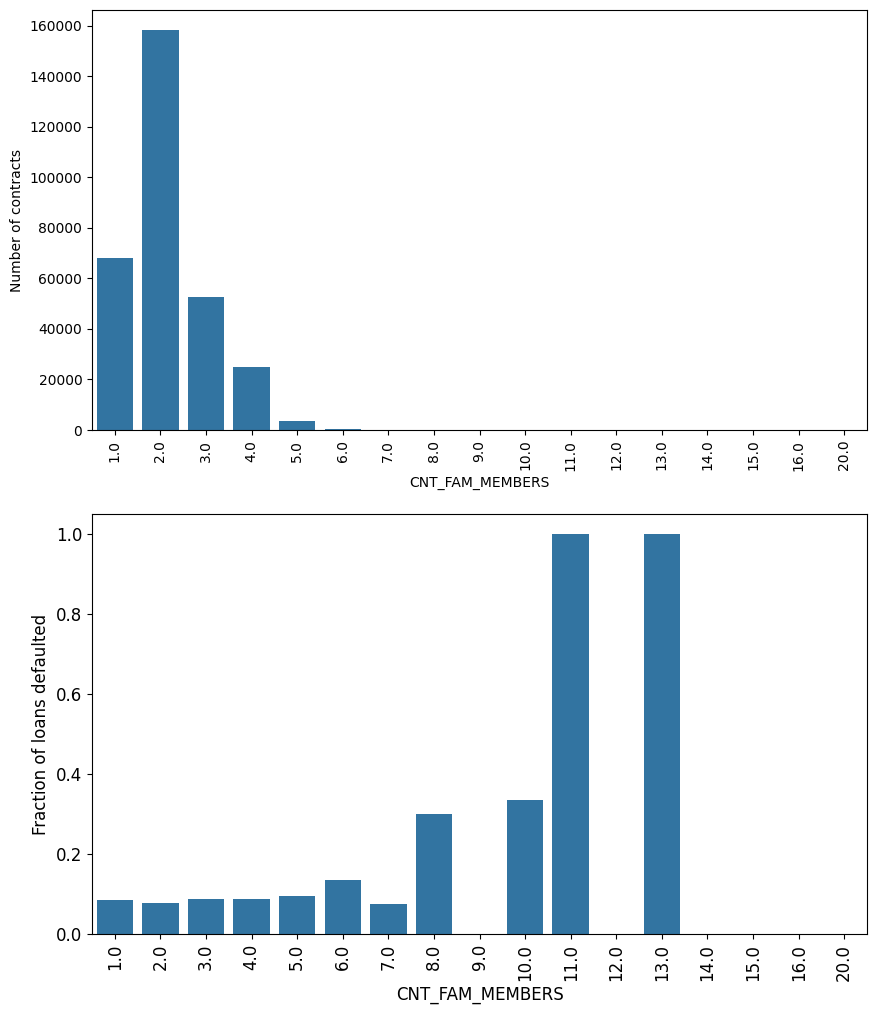

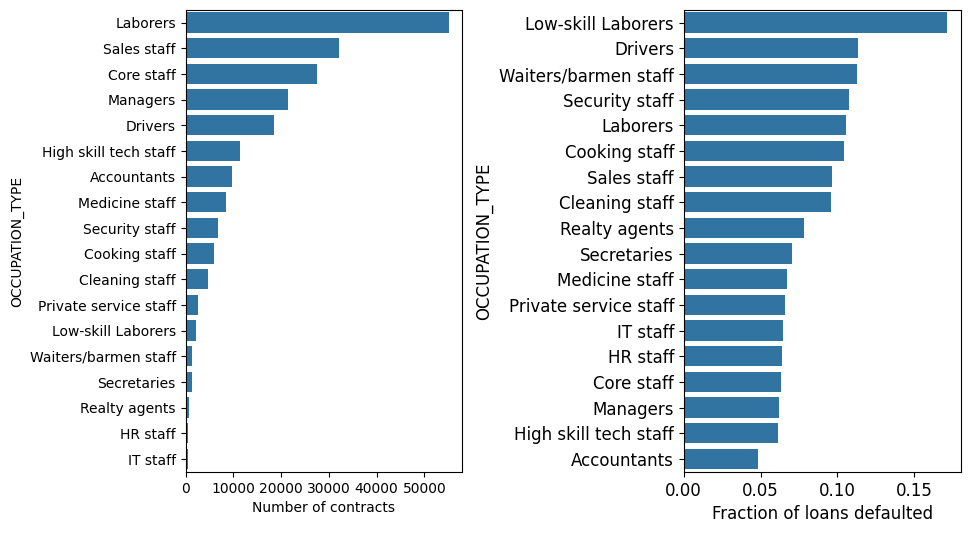

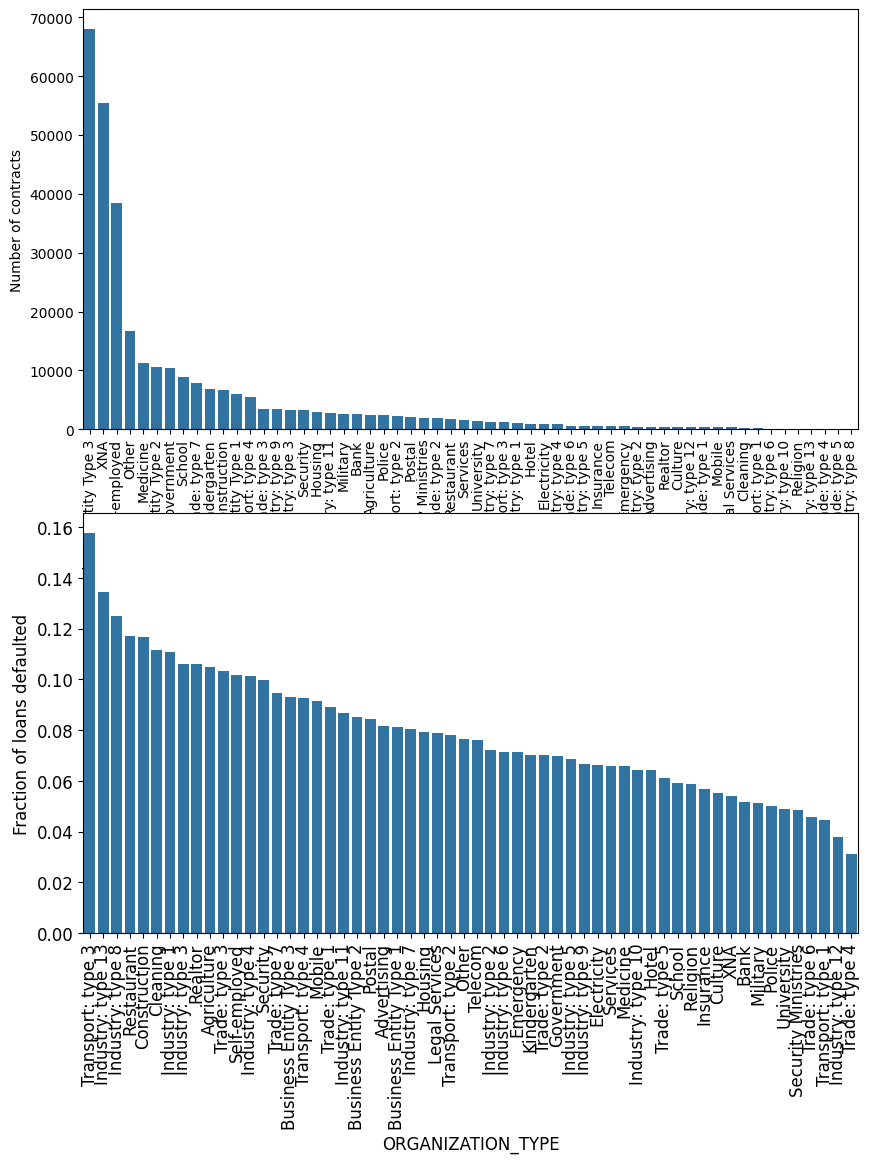

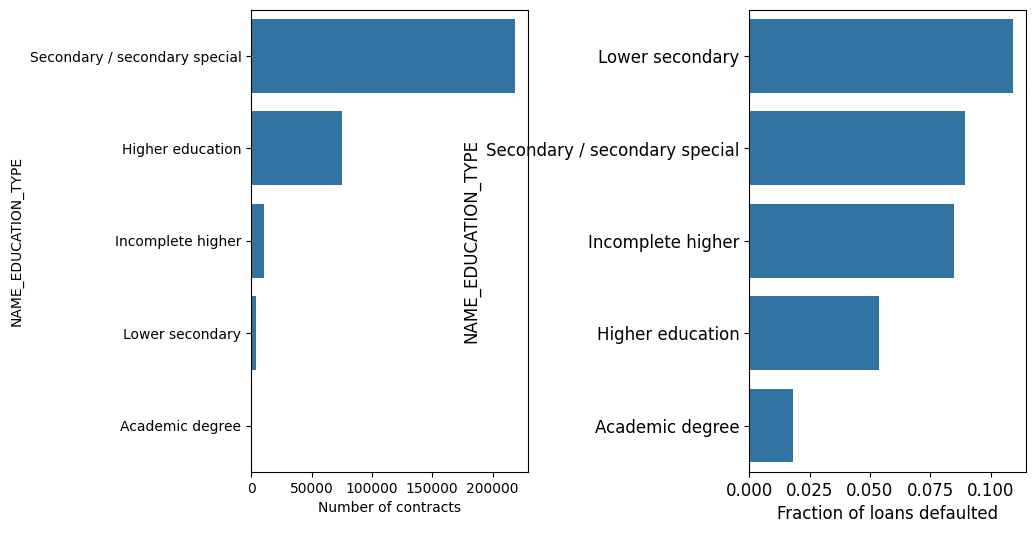

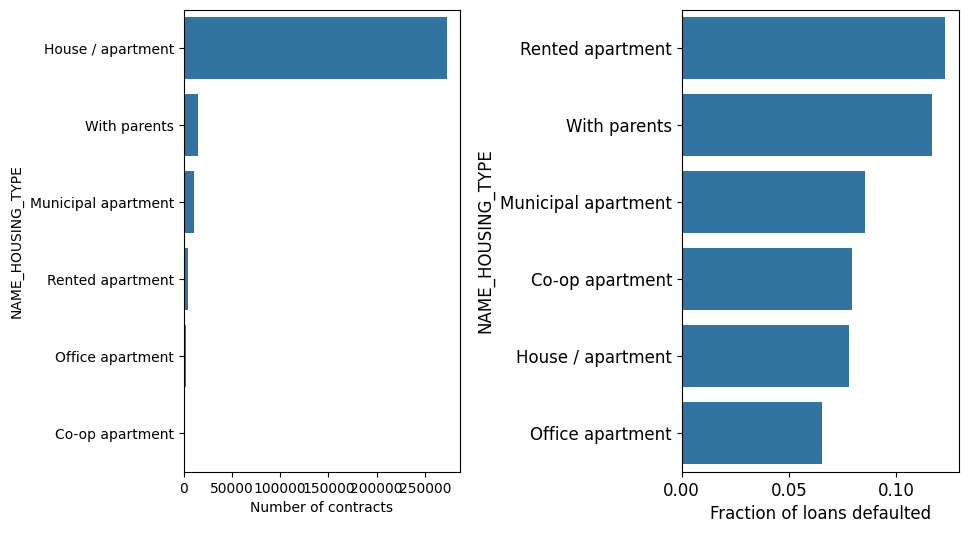

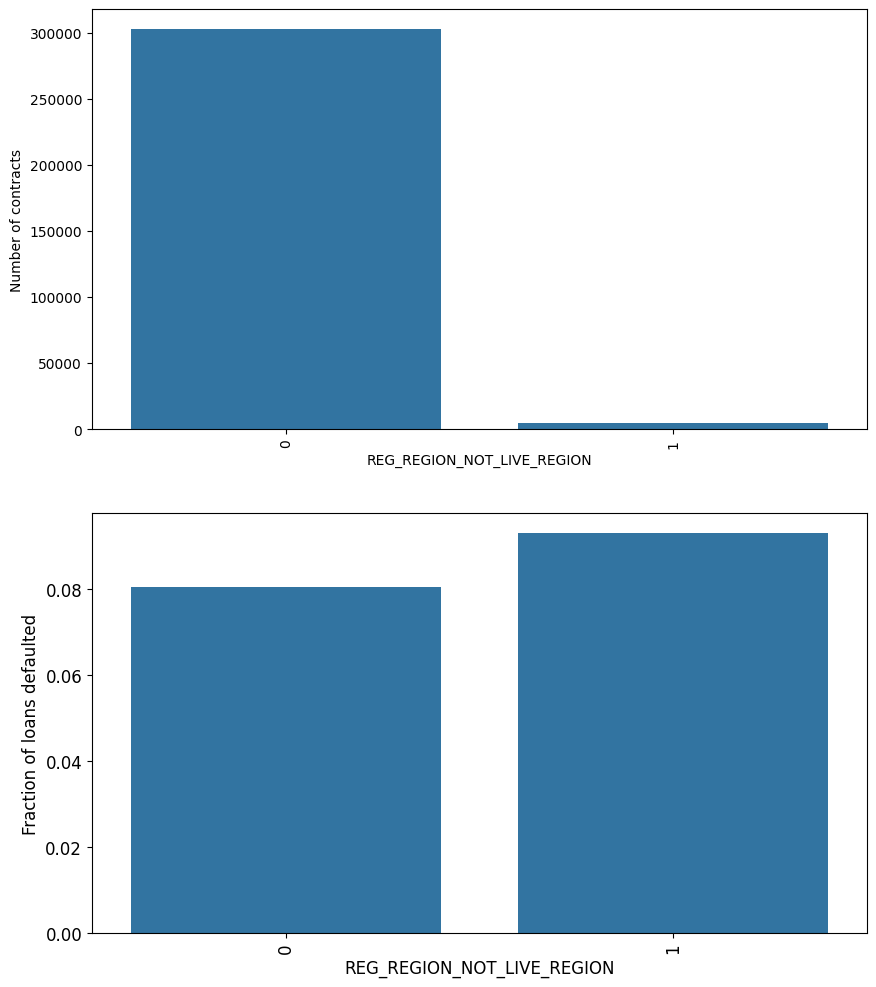

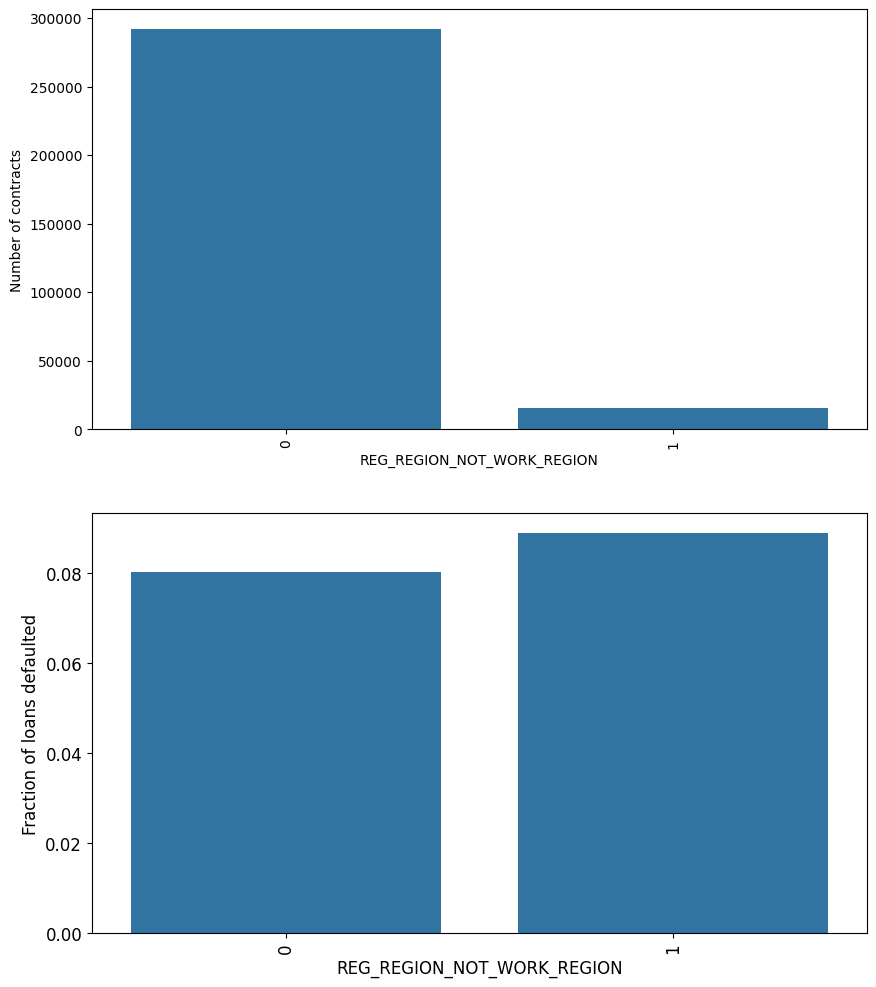

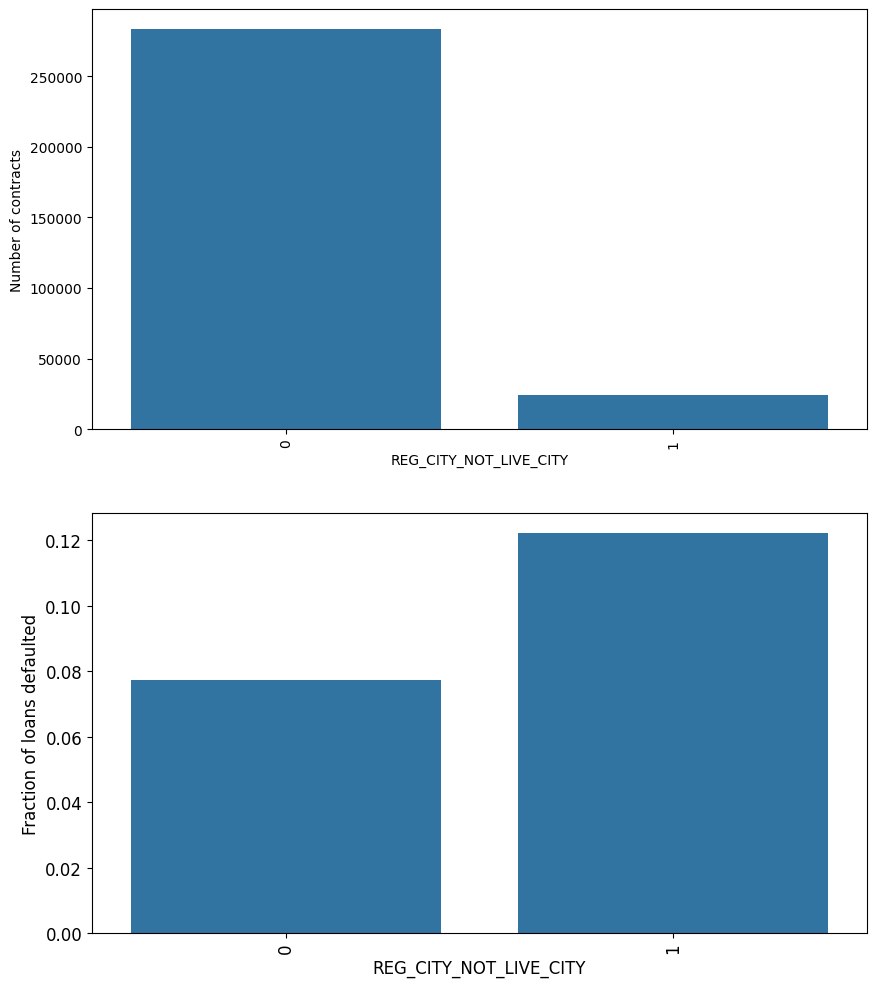

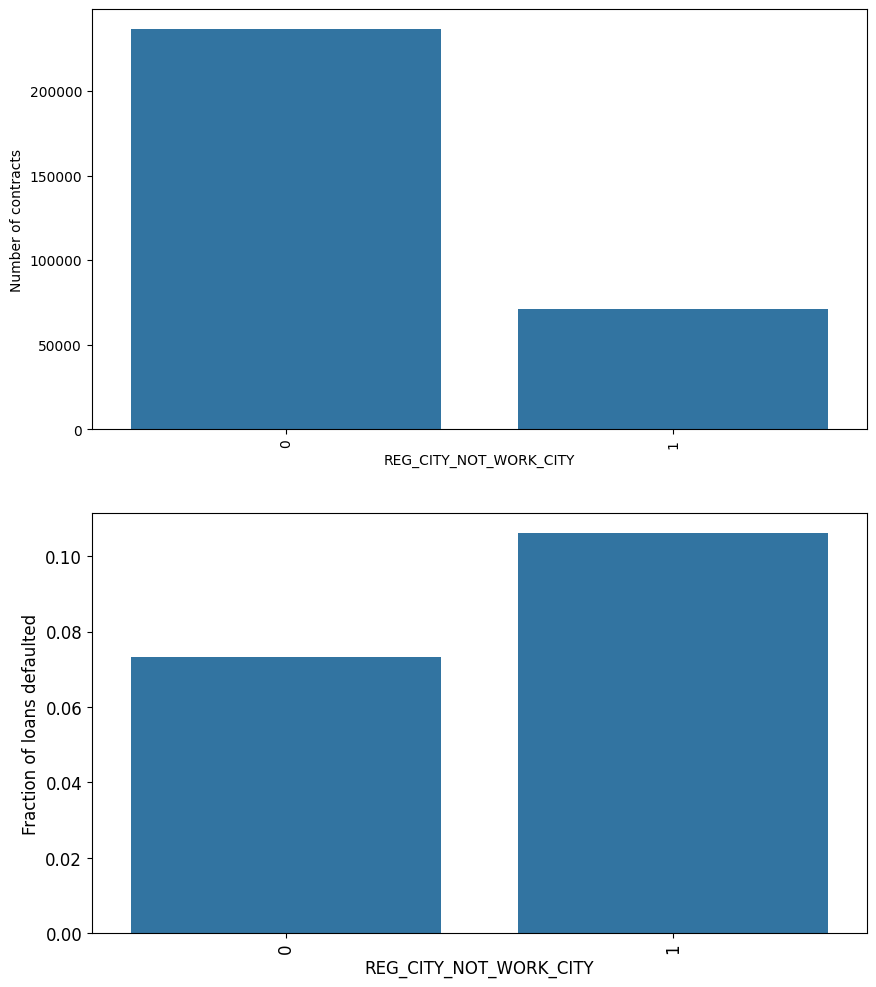

In [23]:
plot_bar_gen('NAME_CONTRACT_TYPE')
plot_bar_gen('CODE_GENDER')
plot_bar_gen('FLAG_OWN_CAR')
plot_bar_gen('FLAG_OWN_REALTY')
plot_bar_gen('NAME_FAMILY_STATUS')
plot_bar_gen('NAME_INCOME_TYPE')
plot_bar_gen('CNT_CHILDREN',None,False)
plot_bar_gen('CNT_FAM_MEMBERS',None,False)
plot_bar_gen('OCCUPATION_TYPE')
plot_bar_gen('ORGANIZATION_TYPE',None,False)
plot_bar_gen('NAME_EDUCATION_TYPE')
plot_bar_gen('NAME_HOUSING_TYPE')
plot_bar_gen('REG_REGION_NOT_LIVE_REGION',None,False)
plot_bar_gen('REG_REGION_NOT_WORK_REGION',None,False)
plot_bar_gen('REG_CITY_NOT_LIVE_CITY',None,False)
plot_bar_gen('REG_CITY_NOT_WORK_CITY',None,False)


-  Target plot for categorical columns
-  The plot bar which represents target values in categorical columns.

In [24]:
# Plot distribution of one feature with or without paid/default shown separately

def plot_distribution_gen(feature,df=None,separate_target=False):
    if df is None:
        df = data
    else:
        df = df

    if separate_target == False:
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.distplot(df[feature].dropna(),color='blue', kde=True,bins=100)
    else:
        t1 = df.loc[df['TARGET'] != 0]
        t0 = df.loc[df['TARGET'] == 0]

        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.set_style('whitegrid')
        #sns.kdeplot(t1[feature], bw=0.5,label="Loan defaulted (TARGET=1)")
        #sns.kdeplot(t0[feature], bw=0.5,label="Loan repaid (TARGET = 0)")

        sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')

        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend(loc="best", labels=['Loan repaid (TARGET=0)', 'Loan defaulted (TARGET=1)'])
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [25]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(data[feature])
    sdev=np.std(data[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

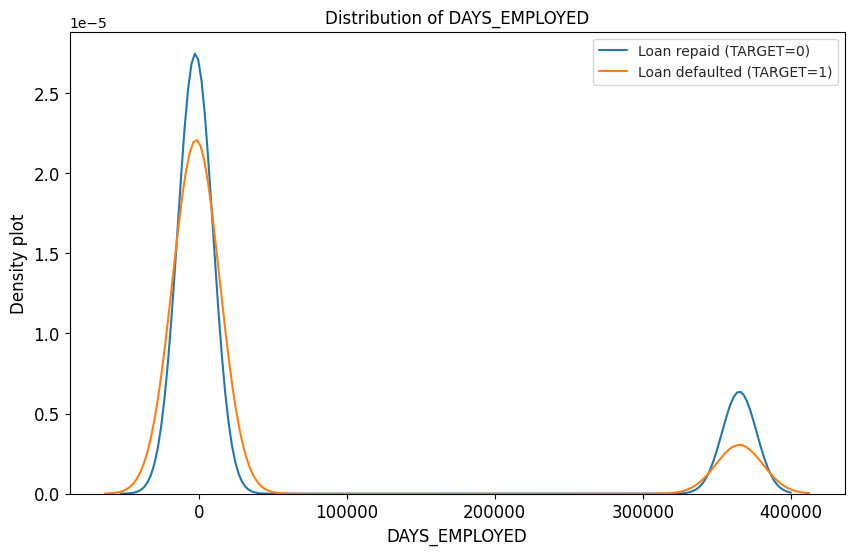

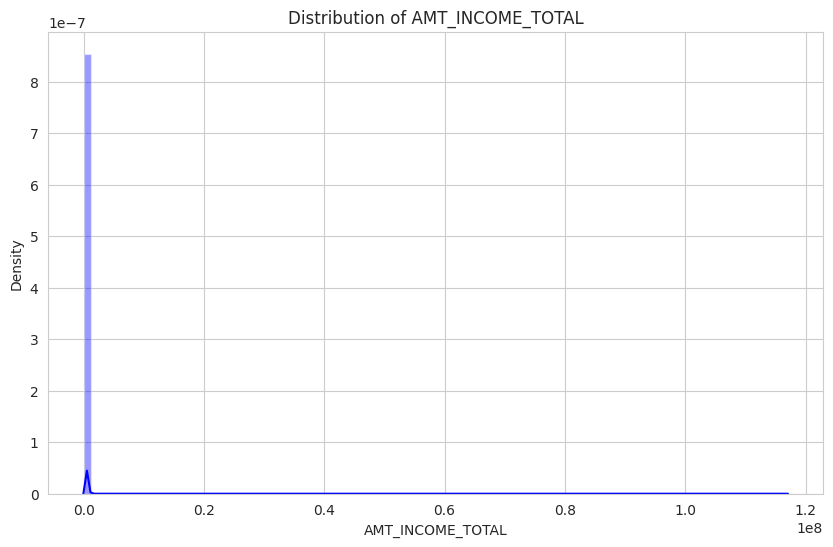

In [26]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)
plot_distribution_gen('AMT_INCOME_TOTAL')

  The data has target = 0 for people who can repaid the loan and target = 1 for people who default of  the loan.

In [27]:
def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.nan})

    return df

In [28]:
# Replace all the day outliers
data_new = replace_day_outliers(data)
bureau_new = replace_day_outliers(bureau )
bureau_balance_new  = replace_day_outliers(bureau_balance)
credit_card_balance_new  = replace_day_outliers(credit_card_balance)
installments_payments_new = replace_day_outliers(installments_payments)
pos_cash_balance_new = replace_day_outliers(pos_cash_balance )
previous_application_new  = replace_day_outliers(previous_application)

In [29]:
def remove_missing_col(df):
    miss_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0])
    miss_data_col=miss_data[miss_data[0]>60].index
    data_new  = df[[i for i in df.columns if i not in miss_data_col]]
    return data_new

In [31]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):

      def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [32]:
data_train = pd.get_dummies(data_new)

In [33]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 246 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: bool(140), float64(66), int64(40)
memory usage: 289.7 MB


In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Remove SK_ID_CURR from training data
skid_temp = data_new['SK_ID_CURR']
train = data_train.drop(columns=['SK_ID_CURR'])

# Feature names
features = list(train.columns)

# Scale each feature to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Median imputation of missing values
imputer = SimpleImputer(strategy='median')
train = imputer.fit_transform(train)

# Scale the data
train = scaler.fit_transform(train)

# Create DataFrame with transformed data
data_train = pd.DataFrame(data=train, columns=features)

print('Data shape:', data_train.shape)


Data shape: (307511, 245)


In [37]:
X= data_train.drop('TARGET',axis=1)
y= data_train['TARGET']

In [38]:
#train and test of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.25, stratify=y, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

In [40]:
#Finding accuracy with algorithms
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(),  KNeighborsClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'KNeighborsClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.91928770259372
RandomForsetClassifier
0.9194047711959208
DecisionTreeClassifier
0.8537943234735555
KNeighborsClassifier
0.9148130804651525


In [41]:
#ROC score of logistic model
from sklearn.metrics import roc_auc_score

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_score = roc_auc_score(y_test, y_probs)

print("ROC AUC Score:", roc_score)


ROC AUC Score: 0.746712319980569


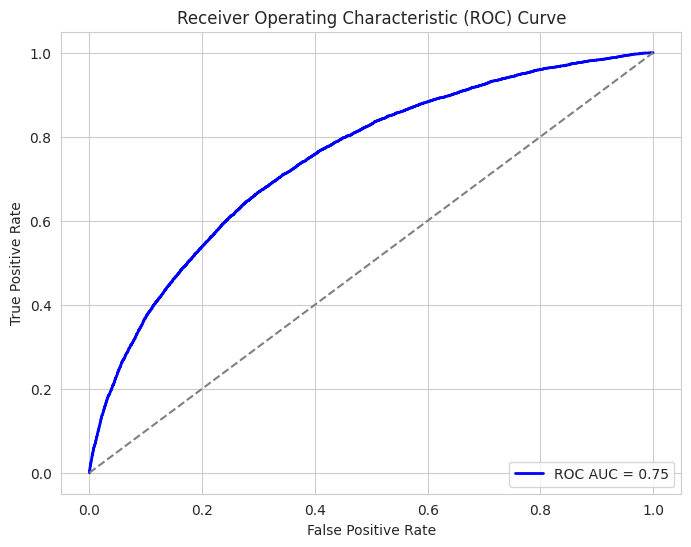

In [42]:
#plot of ROC and AUS score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute ROC AUC score
roc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The label on the plot displays the computed ROC AUC score, which quantifies the model's discriminatory power.
A higher AUC score (closer to 1) indicates better model performance in distinguishing between the positive and negative classes.

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     70672
         1.0       0.18      0.02      0.03      6206

    accuracy                           0.91     76878
   macro avg       0.55      0.50      0.49     76878
weighted avg       0.86      0.91      0.88     76878



In [44]:
import pickle

In [45]:
submission = pd.DataFrame({'Predictions': y_pred })
submission.to_csv('submission.csv', index=False)

In [46]:
from google.colab import files

In [47]:
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model , f)

In [48]:
files.download('logistic_model.pkl')
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>